In [1]:
library(tidyverse)

source('../utils/plottingUtilities.R')

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: scales

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor

Loading required package: gridExtra

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: grid


# Load instabilities

In [2]:
dict_dir <- '../scripts/staNMFDicts/'

In [3]:
k1 <- 3
k2 <- 30

In [4]:
stabilities <- c()
for(k in k1:k2){
    stability_file_k <- paste0(dict_dir, 'K=', k, '/instability.csv')
    stabilities <- rbind(stabilities, 
                         read.csv(stability_file_k, sep = ',', header = FALSE))
}

colnames(stabilities) <- c('n_pp', 'instability')

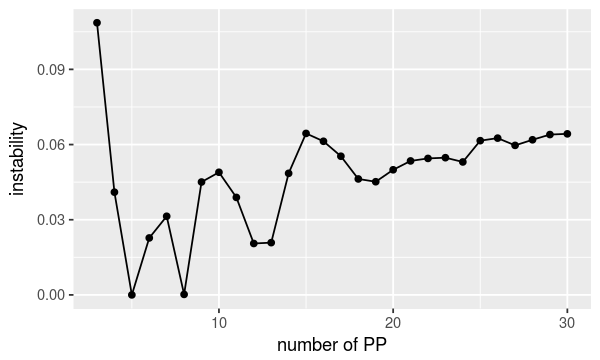

In [5]:
options(repr.plot.width = 5, repr.plot.height = 3)
stabilities %>% 
    ggplot() + geom_point(aes(x = n_pp, y = instability)) + 
                geom_line(aes(x = n_pp, y = instability)) + 
        xlab('number of PP') 

# Check out PPs

In [6]:
fits_dir <- '../fits/'

In [7]:
# need the template
load('../data/lateData.Rdata')

In [11]:
load('../fits/late_K10.Rdata')

Warning message:
“file ‘late_K10.Rdata’ has magic number 'RDX3'
  Use of save versions prior to 2 is deprecated”

ERROR: Error in load("../fits/late_K10.Rdata"): bad restore file magic number (file may be corrupted) -- no data loaded


In [9]:
# choose a K
K <- 5

# read in dictionary 
# for now, we just pick any restart ... 
load(paste0('../fits/late_K', K, '.Rdata'))
plot_all_PPs(fit$dict, late$x)

Warning message:
“file ‘late_K5.Rdata’ has magic number 'RDX3'
  Use of save versions prior to 2 is deprecated”

ERROR: Error in load(paste0("../fits/late_K", K, ".Rdata")): bad restore file magic number (file may be corrupted) -- no data loaded


[1] 1 2 3 4 5 6 7 8

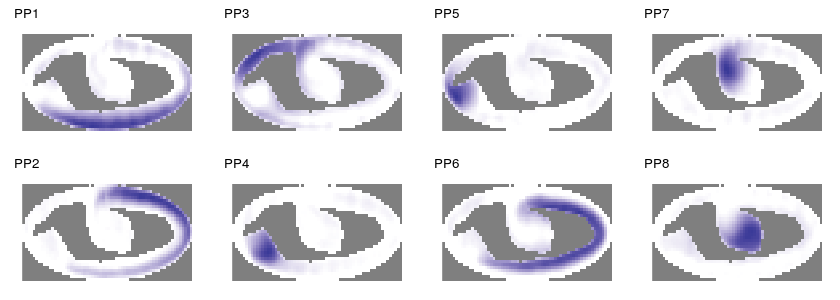

In [8]:
### choose a K
K <- 8

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 2.5)

plot_all_PPs(PPs[, -1], late$x, ncols = 4)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19

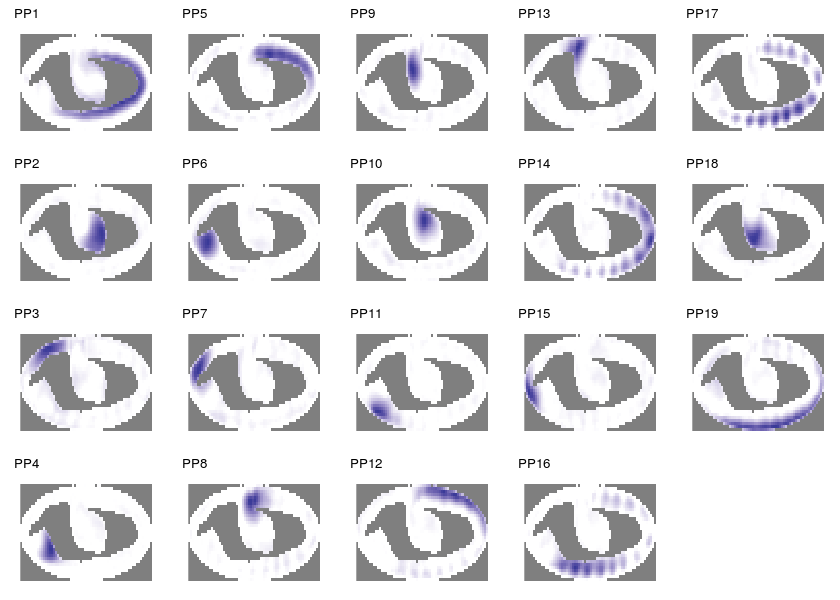

In [12]:
# choose a K
K <- 19

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 5)

plot_all_PPs(PPs[, -1], late$x)

In [13]:
read.csv('../scripts/staNMFDicts/K=19/alpha_99.Rdata')[-1]

pnr,CG11648,CG10645,Mkp3,Mkp3.1,CG8896,Sop2,CG1829,CG11755,CG11755.1,⋯,rib,term_1,term_1.1,term_2,term_3,term_4,Dr_1,Dr_2,Dr_3,Dr_3.1
0.00000000,0.0000000,0.18033434,0.00000000,0.00000000,0.5406930,0.80141969,0.06168997,0.6349932,0.28309106,⋯,3.37721212,2.0174754,1.886567118,0.00000000,0.07446741,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000
1.06608452,0.0000000,0.33354696,0.00000000,0.00000000,0.0000000,0.05866670,0.03997130,0.1387251,0.21221379,⋯,0.36606715,3.5351963,4.142933954,1.13194561,0.01233835,4.45987407,0.00000000,0.0000000,0.0000000,0.0000000
0.00000000,0.0000000,0.04208097,0.06583440,0.01428836,1.4700785,0.00000000,1.88295895,0.1088735,0.04644229,⋯,0.00000000,0.0000000,0.005977117,0.00000000,0.12443335,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000
0.07287983,0.0000000,0.18434421,0.00000000,0.20194510,0.1921291,0.83657543,0.22534558,0.7332155,0.28589136,⋯,0.00000000,0.0000000,0.317970049,0.00000000,0.00000000,0.00000000,0.34340686,0.3492243,0.1962181,1.8914547
0.00000000,0.0000000,0.52210931,0.00000000,0.01980442,0.1434662,0.65645155,0.00000000,0.7358555,0.19132832,⋯,2.91464194,2.3386022,0.509802367,0.00000000,0.00000000,0.00000000,0.00000000,0.7867290,0.0000000,0.0000000
0.00000000,0.0000000,1.12395796,0.00000000,0.00000000,0.7533411,0.87812306,0.71608754,0.9762478,0.88446595,⋯,0.58588841,3.0031065,2.124281616,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000
0.00000000,0.0000000,0.41612897,0.00000000,0.00000000,2.3238536,0.05165906,0.00000000,0.3436362,0.12152180,⋯,0.00000000,0.0000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000
0.00000000,3.6993440,2.81272711,0.00000000,0.00000000,1.2996311,0.54241709,0.12991566,0.4762875,0.75141109,⋯,0.00000000,2.5559342,0.452878366,0.00000000,0.14108752,1.46402075,0.00000000,0.0000000,0.0000000,0.0000000
1.07124833,0.8519215,4.37547053,0.22905213,0.35137527,0.7822375,0.80160782,0.00000000,0.3906870,0.41739647,⋯,3.66387862,2.3275211,2.598137836,0.43987369,0.37903990,2.49234178,0.00000000,0.0000000,0.0000000,0.0000000
1.06405178,0.7094300,0.26629375,0.45443634,0.81043028,0.0000000,0.59555330,0.05335592,0.5868038,0.33511172,⋯,1.34387393,1.4527496,2.698478511,0.41085328,0.51221049,2.73408479,0.00000000,0.0000000,0.0000000,0.0000000
